In [316]:
import pandas as pd
import torch as torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [317]:
df=pd.read_csv('LSTM_train_week4.csv',index_col=['Date'])
df=df.iloc[:,0:1]
df.head(5)

,Price
Date,
4-Jan-21,47.62
5-Jan-21,49.93
6-Jan-21,50.63
7-Jan-21,50.83
8-Jan-21,52.24


In [318]:
df.tail()

,Price
Date,
23-Nov-22,77.94
24-Nov-22,77.95
25-Nov-22,76.28
28-Nov-22,77.24
29-Nov-22,78.20


<AxesSubplot:xlabel='Date'>

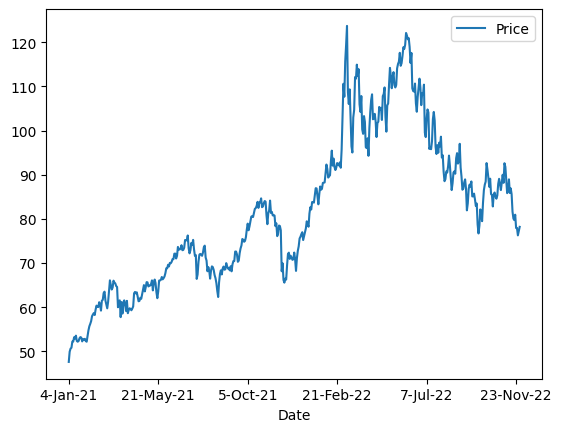

In [319]:
df.plot()

In [320]:
df.describe()

,Price
count,505.000000
mean,81.492970
std,17.280587
min,47.620000
25%,68.150000
50%,79.730000
75%,92.520000
max,123.700000


In [321]:
ds=df['Price'].values
# plt.plot(ds)
ds

array([ 47.62,  49.93,  50.63,  50.83,  52.24,  52.25,  53.21,  52.91,
        53.57,  52.36,  52.2 ,  52.36,  52.98,  53.24,  53.13,  52.27,
        52.77,  52.61,  52.85,  52.34,  52.2 ,  53.55,  54.76,  55.69,
        56.23,  56.85,  57.97,  58.36,  58.68,  58.24,  59.47,  60.37,
        60.09,  60.05,  61.14,  60.52,  59.24,  61.49,  61.67,  63.22,
        63.53,  61.5 ,  60.64,  59.75,  61.28,  63.83,  66.09,  65.05,
        64.01,  64.44,  66.02,  65.61,  65.39,  64.8 ,  64.6 ,  60.  ,
        61.42,  61.55,  57.76,  61.18,  58.56,  60.97,  61.56,  60.55,
        59.16,  61.45,  58.65,  59.33,  59.77,  59.6 ,  59.32,  59.7 ,
        60.18,  63.15,  63.46,  63.13,  63.38,  62.44,  61.35,  61.43,
        62.14,  61.91,  62.94,  63.86,  65.01,  63.58,  64.49,  65.69,
        65.63,  64.71,  64.9 ,  64.92,  65.28,  66.08,  63.82,  65.37,
        66.27,  65.49,  63.36,  62.05,  63.58,  66.05,  66.07,  66.21,
        66.85,  66.32,  66.59,  66.96,  67.72,  68.83,  68.81,  69.62,
      

In [322]:
from sklearn.preprocessing import MinMaxScaler

In [323]:
normalizer=MinMaxScaler(feature_range=(0,1))
ds_scaled=normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [324]:
len(ds_scaled),len(ds)

(505, 505)

In [325]:
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size
train_size,test_size

(353, 152)

In [326]:
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]
len(ds_test),len(ds_train)

(152, 353)

In [327]:
def create_ds(dataset,step):
    Xtrain,Ytrain=[],[]
    
    for i in range(len(dataset)-step-1):
        a=dataset[i:(i+step),0]
        Xtrain.append(a)
        Ytrain.append(dataset[i+step,0])
    return np.array(Xtrain),np.array(Ytrain)

In [328]:
time_stamp=50
X_train,y_train=create_ds(ds_train,time_stamp)
X_test,y_test=create_ds(ds_test,time_stamp)
X_train.shape,y_train.shape


((302, 50), (302,))

In [329]:
X_test.shape, y_test.shape

((101, 50), (101,))

In [330]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [331]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [332]:
model=Sequential()
model.add(LSTM(units=40,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=40,return_sequences=True))
model.add(LSTM(units=20))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 50, 40)            6720      
                                                                 
 lstm_25 (LSTM)              (None, 50, 40)            12960     
                                                                 
 lstm_26 (LSTM)              (None, 20)                4880      
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 24,581
Trainable params: 24,581
Non-trainable params: 0
_________________________________________________________________


In [333]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=40,batch_size=30)

Epoch 1/40
11/11 [==============================] - 7s 183ms/step - loss: 0.0506 - val_loss: 0.0123
Epoch 2/40
11/11 [==============================] - 1s 68ms/step - loss: 0.0116 - val_loss: 0.0034
Epoch 3/40
11/11 [==============================] - 1s 68ms/step - loss: 0.0083 - val_loss: 0.0052
Epoch 4/40
11/11 [==============================] - 1s 68ms/step - loss: 0.0071 - val_loss: 0.0052
Epoch 5/40
11/11 [==============================] - 1s 68ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 6/40
11/11 [==============================] - 1s 67ms/step - loss: 0.0048 - val_loss: 0.0076
Epoch 7/40
11/11 [==============================] - 1s 67ms/step - loss: 0.0045 - val_loss: 0.0064
Epoch 8/40
11/11 [==============================] - 1s 69ms/step - loss: 0.0046 - val_loss: 0.0065
Epoch 9/40
11/11 [==============================] - 1s 68ms/step - loss: 0.0044 - val_loss: 0.0090
Epoch 10/40
11/11 [==============================] - 1s 67ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 11

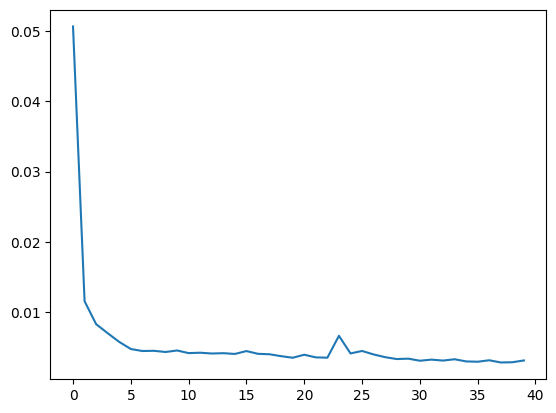

In [334]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [335]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


4/4 [==============================] - 0s 18ms/step


In [336]:
train_predict.shape,test_predict.shape,ds.shape

((302, 1), (101, 1), (505,))

In [337]:
buffer=np.zeros(-train_predict.shape[0]-test_predict.shape[0]+ds_scaled.shape[0])
buffer=buffer.reshape(-1,1)
buffer.shape

(102, 1)

In [338]:
ds.shape

(505,)

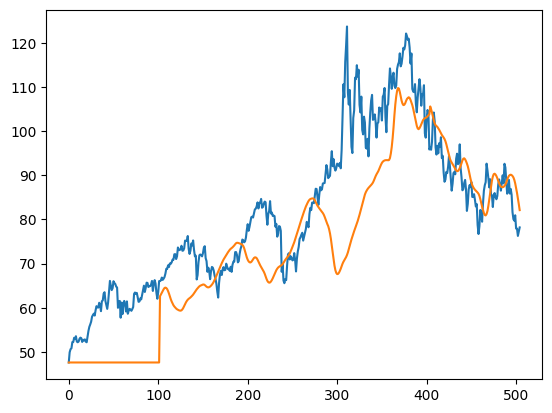

In [339]:
test = np.vstack((buffer,train_predict,test_predict))
#Combining the predited data to create uniform data visualization
plt.plot(ds)
plt.plot(normalizer.inverse_transform(test))

In [340]:
ds_test.shape

(152, 1)

In [341]:
# ds_test
fut_inp=ds_test[len(ds_test)-time_stamp:]
fut_inp=fut_inp.reshape(1,-1)
fut_inp.shape

(1, 50)

In [342]:
tmp_inp=fut_inp[0].tolist()
tmp_inp

[0.46424815983175605,
 0.471477392218717,
 0.40904311251314396,
 0.3823606729758149,
 0.40588853838065186,
 0.4538643533123028,
 0.44177181913774977,
 0.41890115667718186,
 0.4733175604626707,
 0.51130389064143,
 0.527602523659306,
 0.5366719242902207,
 0.5917455310199788,
 0.5718980021030493,
 0.5485015772870661,
 0.5211619348054679,
 0.545347003154574,
 0.4993427970557307,
 0.49737118822292303,
 0.4626708727655098,
 0.4985541535226077,
 0.5042060988433228,
 0.4919821240799158,
 0.48580441640378536,
 0.4955310199789693,
 0.5295741324921135,
 0.5449526813880126,
 0.5294426919032598,
 0.511435331230284,
 0.5356203995793902,
 0.5570452155625656,
 0.5329915878023133,
 0.5913512092534174,
 0.5805730809674028,
 0.5427181913774972,
 0.5022344900105151,
 0.5106466876971609,
 0.5433753943217665,
 0.5027602523659307,
 0.5165615141955835,
 0.49907991587802303,
 0.447160883280757,
 0.42665615141955837,
 0.42205573080967396,
 0.4380914826498423,
 0.398527865404837,
 0.3986593059936909,
 0.37670872

In [343]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=time_stamp
i=0
while(i<30):
    if(len(tmp_inp)>time_stamp):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    
lst_output=normalizer.inverse_transform(lst_output)

print(lst_output)

[[79.5462637 ]
 [78.54951834]
 [77.78526814]
 [77.23072387]
 [76.84672139]
 [76.59259107]
 [76.43340648]
 [76.34423799]
 [76.30522578]
 [76.29945988]
 [76.31878913]
 [76.35850422]
 [76.41538323]
 [76.48526556]
 [76.57011019]
 [76.66853632]
 [76.77932636]
 [76.89900446]
 [77.02963618]
 [77.16784769]
 [77.31387705]
 [77.4636657 ]
 [77.6178553 ]
 [77.77616469]
 [77.93732415]
 [78.09994833]
 [78.26266093]
 [78.42576579]
 [78.58968917]
 [78.75377806]]


In [344]:
fut_inp.shape

(1, 50, 1)

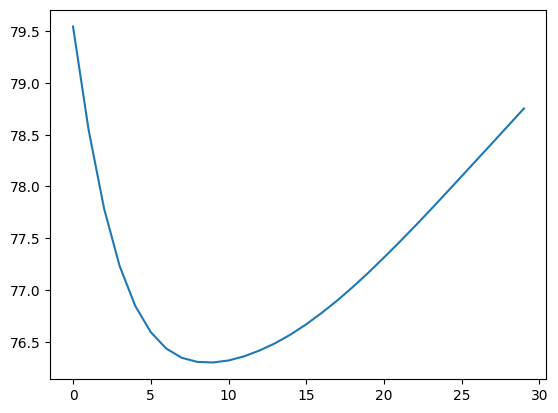

In [345]:
ds_new = ds.tolist()
ds_new.extend(lst_output)
plt.plot(ds_new[505:])

/home/akshat/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


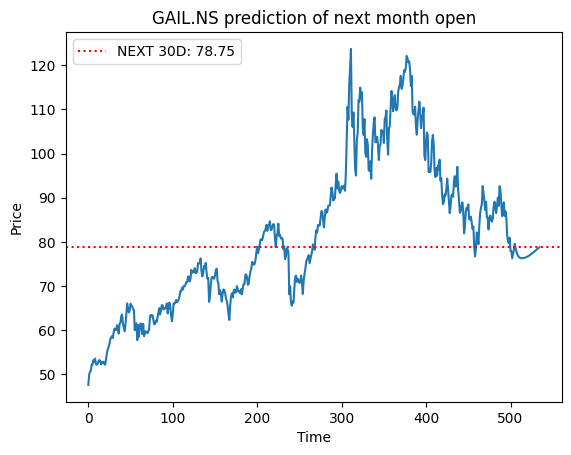

In [346]:
plt.ylabel("Price")
plt.xlabel("Time")
plt.plot(ds_new)
plt.title("{0} prediction of next month open".format('GAIL.NS'))
plt.axhline(y=ds_new[len(ds_new)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*ds_new[len(ds_new)-1]),2)))
plt.legend()

In [352]:
lst_output.reshape(1,-1)

array([[79.5462637 , 78.54951834, 77.78526814, 77.23072387, 76.84672139,
        76.59259107, 76.43340648, 76.34423799, 76.30522578, 76.29945988,
        76.31878913, 76.35850422, 76.41538323, 76.48526556, 76.57011019,
        76.66853632, 76.77932636, 76.89900446, 77.02963618, 77.16784769,
        77.31387705, 77.4636657 , 77.6178553 , 77.77616469, 77.93732415,
        78.09994833, 78.26266093, 78.42576579, 78.58968917, 78.75377806]])

In [353]:

final=lst_output.reshape(1,-1)
final=final[0]

In [358]:
dates=["30-Nov-2022"]
for i in range(1,30):
    dates.append(f"{i}-Dec-2022")

predictions=pd.DataFrame(data={"oil_price":final,"dates":dates})
# predictions["oil_price"]=lst_output
# predictions["dates"]=dates
predictions.set_index("dates",inplace=True)
predictions

,oil_price
dates,
30-Nov-2022,79.546264
1-Dec-2022,78.549518
2-Dec-2022,77.785268
3-Dec-2022,77.230724
4-Dec-2022,76.846721
5-Dec-2022,76.592591
6-Dec-2022,76.433406
7-Dec-2022,76.344238
8-Dec-2022,76.305226


In [ ]:
predictions.to_csv("problem1final.csv")